In [1]:
# Problem Statement: BigMart has collected sales data for 1559 products across 10 stores in different 
# cities. Attributes of each product and store have been defined. 

# Objective:
# • Build a predictive model and find out the sales of each product at a particular store
# • Using Ridge and Lasso regression techniques, interpret the coefficients of the model
# • Make predictions using the model
# • Evaluate model efficiency using RMSE and R-Square values


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
Bigmart = pd.read_csv(r"C:\Users\Phavour\Downloads\Personal Python-ML project\Simplilearn\Workspace\BigMart\bigmart_train.csv")
Bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
Bigmart.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [5]:
Bigmart.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
Bigmart.shape

(8523, 12)

In [7]:
Bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
Bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Bigmart.duplicated()
Bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
Bigmart["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [11]:
Bigmart.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [12]:
Bigmart["Item_Weight"] = Bigmart["Item_Weight"].fillna(Bigmart["Item_Weight"].mean())
print(Bigmart["Item_Weight"])
print(Bigmart["Item_Weight"].isnull().sum())

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64
0


In [13]:
Bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
Bigmart["Outlet_Size"] = Bigmart["Outlet_Size"].fillna("insignificant")


In [15]:
Bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
Bigmart.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


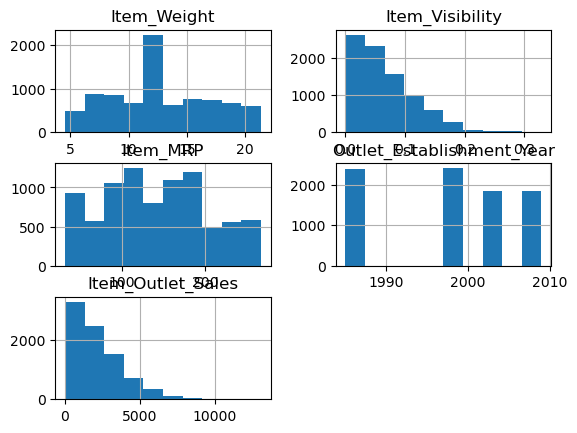

In [17]:

Bigmart.hist()
print(Bigmart.columns)

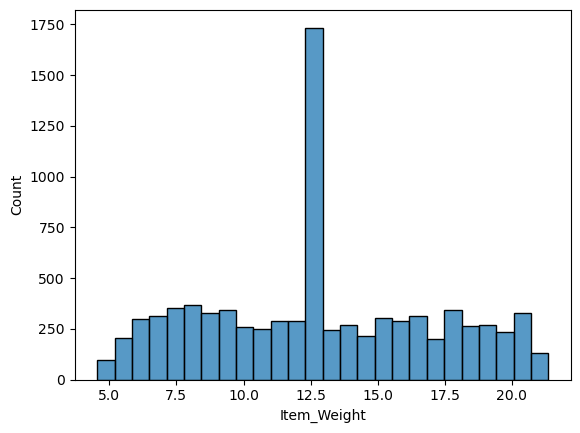

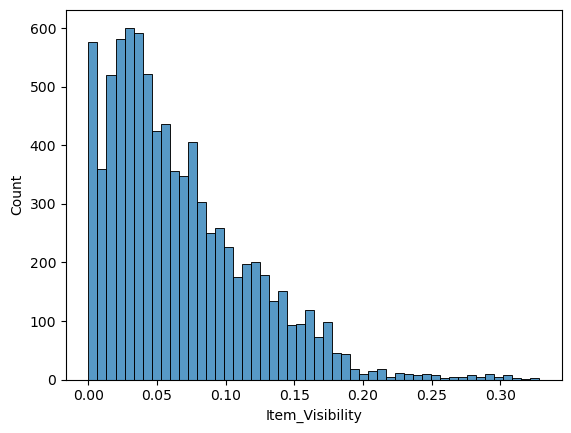

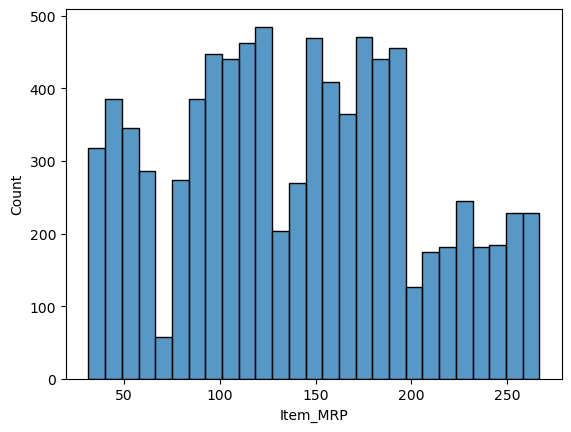

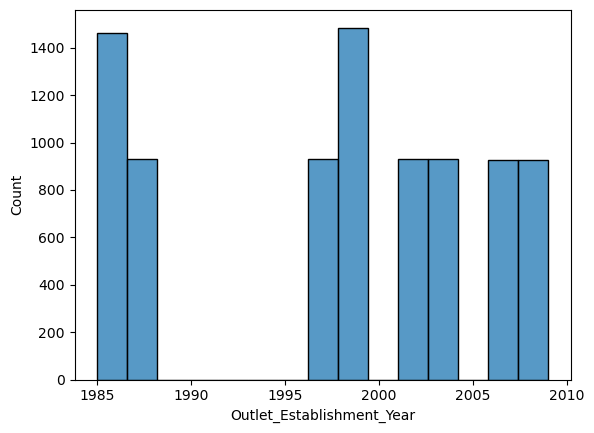

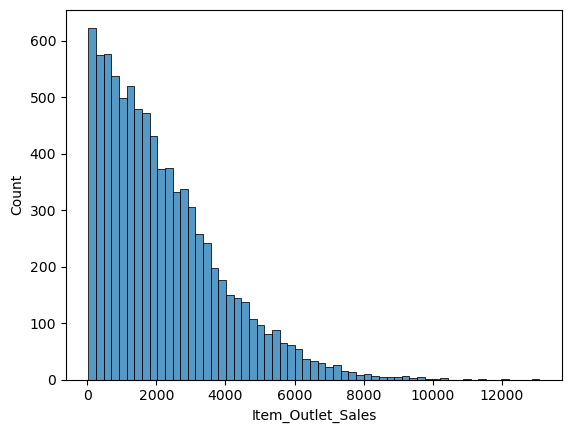

In [18]:
for i in Bigmart.select_dtypes(include='number'):
    sns.histplot(data=Bigmart,x=i)
    plt.show()

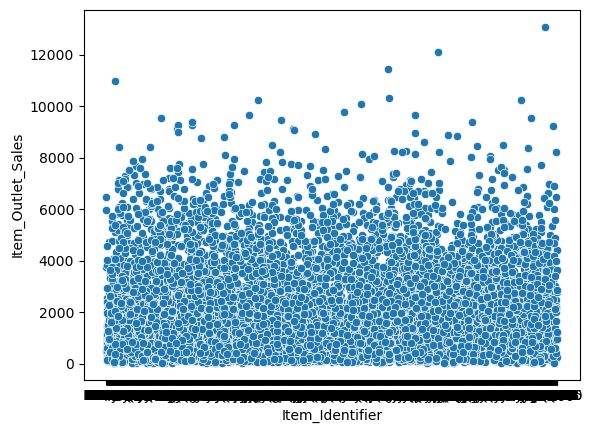

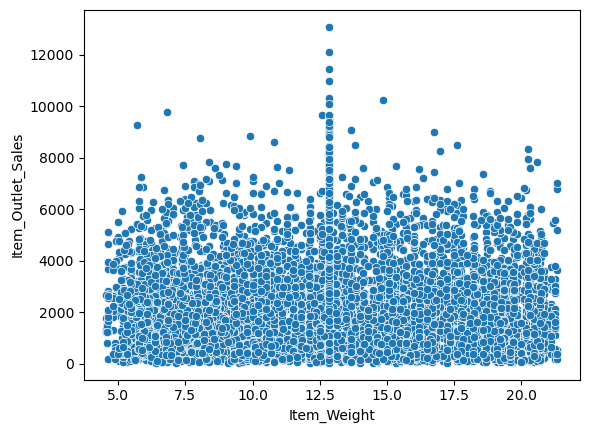

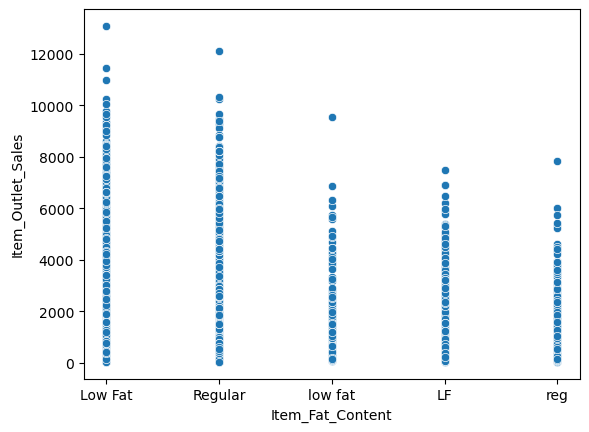

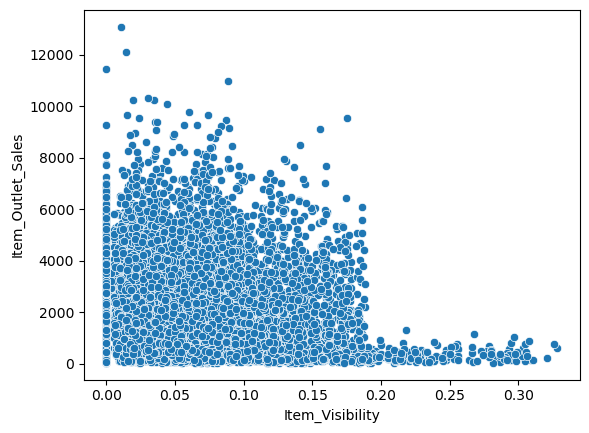

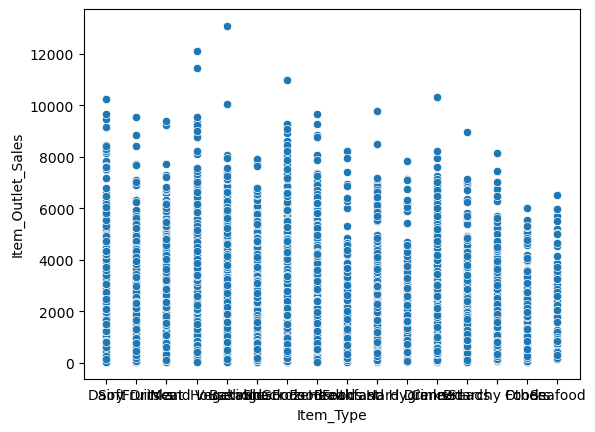

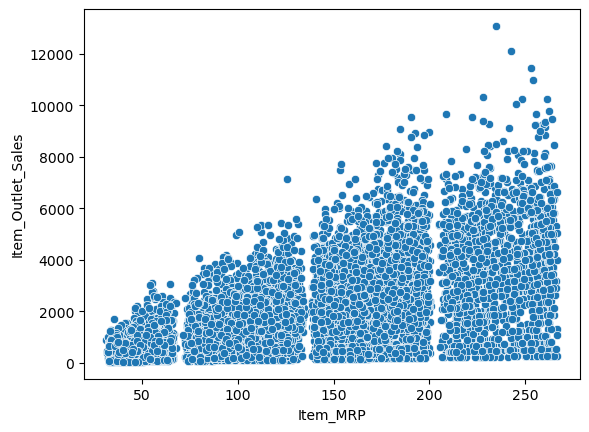

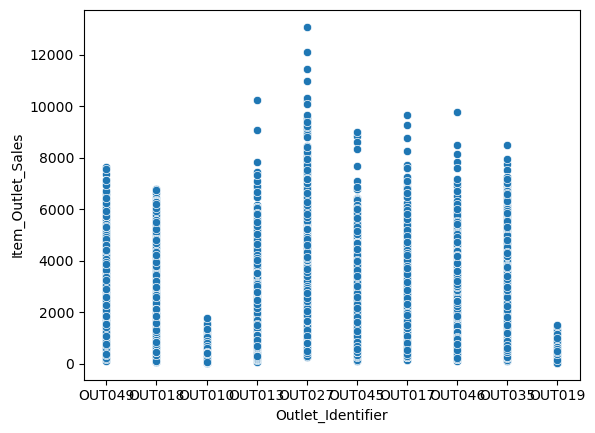

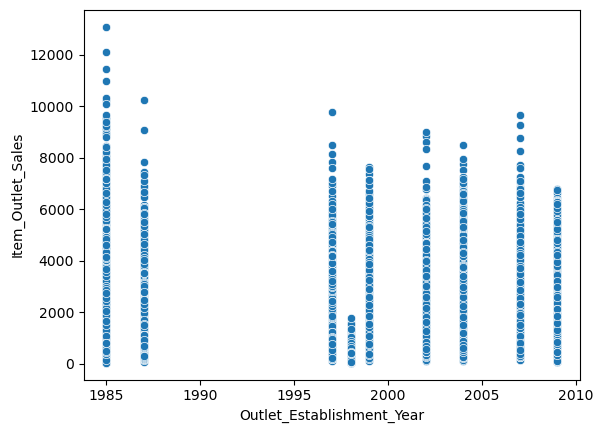

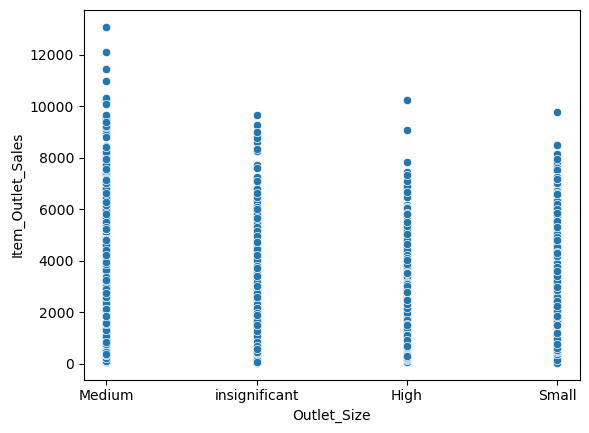

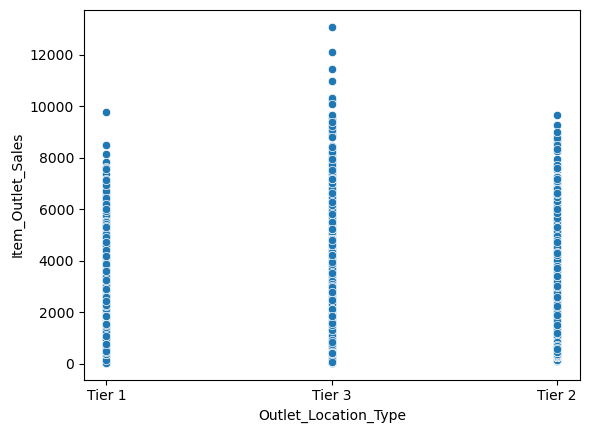

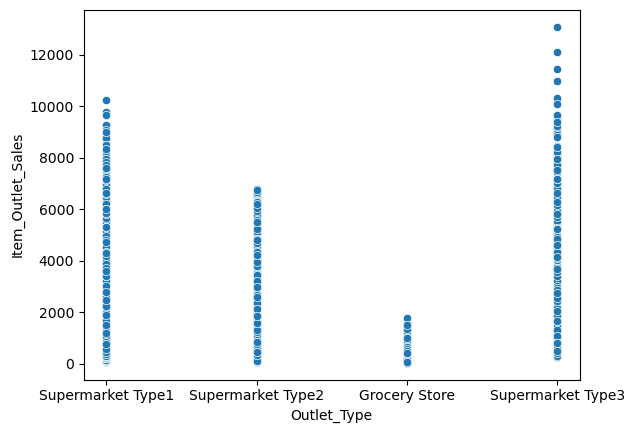

In [19]:
for i in ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']:
    sns.scatterplot(data=Bigmart,x=i,y='Item_Outlet_Sales')
    plt.show()

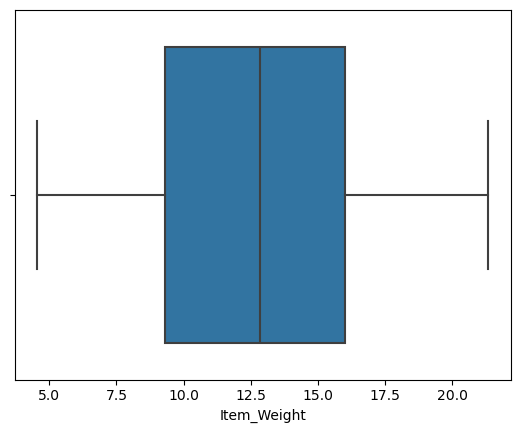

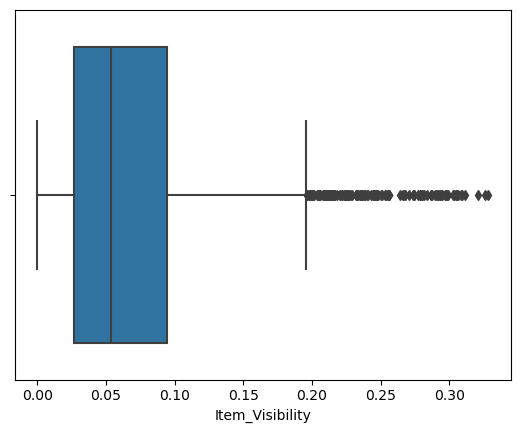

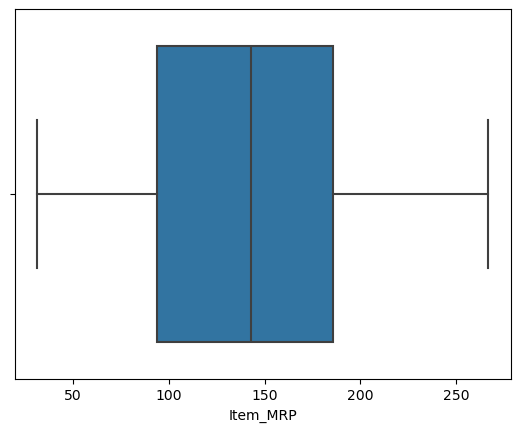

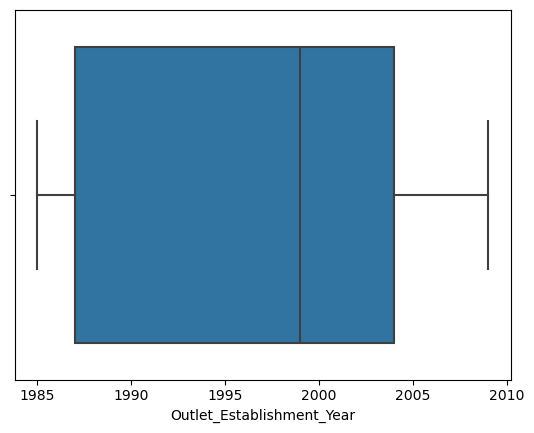

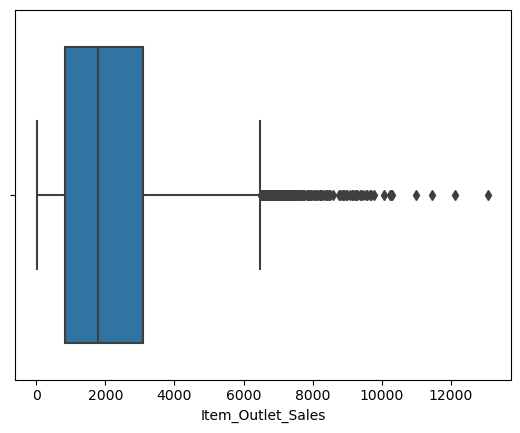

In [20]:
for i in Bigmart.select_dtypes(include='number'):
    sns.boxplot(data=Bigmart,x=i)
    plt.show()

In [21]:
def wisker(col):
    q1, q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lw = q1-1.5*iqr
    uw = q1+1.5*iqr
    return lw, uw

In [22]:
for i in Bigmart.select_dtypes(include='number'):
    lw, uw = wisker(Bigmart[i])
    Bigmart[i] = np.where(Bigmart[i]<lw,lw,Bigmart[i])
    Bigmart[i] = np.where(Bigmart[i]>uw,uw,Bigmart[i])
    

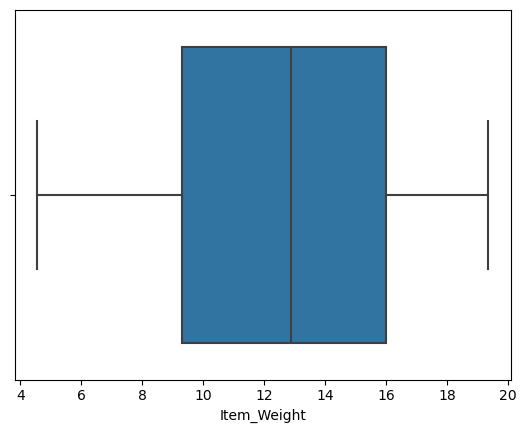

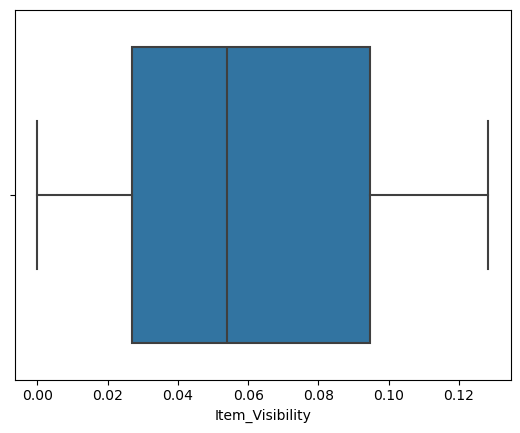

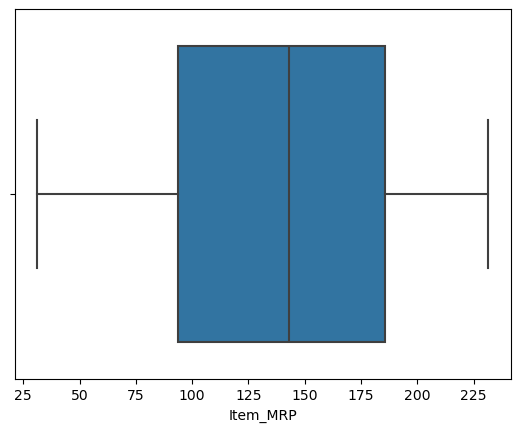

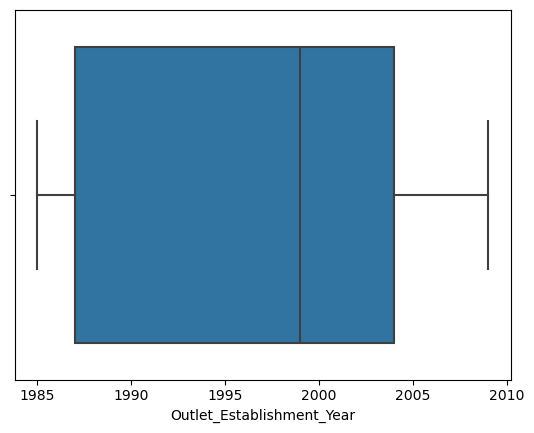

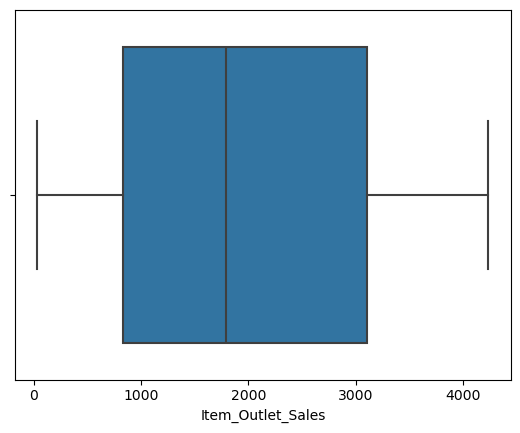

In [23]:
for i in Bigmart.select_dtypes(include='number'):
    sns.boxplot(data=Bigmart,x=i)
    plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [25]:
for i in Bigmart.select_dtypes(include='object'):
    Bigmart[i] = LE.fit_transform(Bigmart[i])


In [26]:
Bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,231.5523,9,1999.0,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009.0,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999.0,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998.0,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987.0,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987.0,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002.0,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004.0,2,1,1,1193.1136
8521,681,7.210,2,0.128383,13,103.1332,3,2009.0,1,2,2,1845.5976


In [27]:
columns_to_encode = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [28]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [29]:
encoded = ohe.fit_transform(Bigmart[columns_to_encode])

In [30]:
encoded_df = pd.DataFrame(encoded,columns=ohe.get_feature_names_out(columns_to_encode))

In [31]:
Bigmart = Bigmart.drop(columns_to_encode,axis=1)
Bigmart = pd.concat([Bigmart,encoded_df],axis=1)
Bigmart

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,...,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0.016047,231.5523,1999.0,3735.1380,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.920,0.019278,48.2692,2009.0,443.4228,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.500,0.016760,141.6180,1999.0,2097.2700,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.200,0.000000,182.0950,1998.0,732.3800,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.930,0.000000,53.8614,1987.0,994.7052,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2778.3834,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8519,8.380,0.046982,108.1570,2002.0,549.2850,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,10.600,0.035186,85.1224,2004.0,1193.1136,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,0.128383,103.1332,2009.0,1845.5976,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x=Bigmart.drop("Item_Outlet_Sales",axis=1)
y = Bigmart['Item_Outlet_Sales']
x
# print(y)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Identifier_5,...,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0.016047,231.5523,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.920,0.019278,48.2692,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.500,0.016760,141.6180,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.200,0.000000,182.0950,1998.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.930,0.000000,53.8614,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8519,8.380,0.046982,108.1570,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,10.600,0.035186,85.1224,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,0.128383,103.1332,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)


In [36]:
model.fit(xtrain,ytrain)

LinearRegression(n_jobs=-1)

In [37]:
model.predict(xtest)

array([ 966.5390625, 1200.0703125, 1254.03125  , ..., 1219.875    ,
        992.703125 , 3603.8203125])

In [38]:
model.coef_

array([ 5.44486410e+00, -4.78743668e+02, -9.74904904e+00, ...,
       -3.50145857e+11,  3.95372310e+11,  1.37940316e+11])

In [39]:
model.score(x,y)

-378025458241984.9

In [40]:
# performing rgularization
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(xtrain)

rid_model = Ridge(alpha=0.01)
rid_model.fit(x_scaled,ytrain)

Ridge(alpha=0.01)

In [42]:
rid_model.predict(xtest)

array([ -61661.47294542,  -41108.38160803,  -40509.65009843, ...,
       -125988.31762612,  -89807.73875932, -147821.53506486])

In [43]:
rid_model.score(xtest,ytest)

-5853.5949874809285

In [44]:
rid_model.intercept_

2031.9725522125377

In [45]:
rid_model.coef_

array([  22.22986399,  -19.57709855, -567.17549811, ...,   93.0673748 ,
        -26.89187562,  145.36847628])

In [46]:
# mse
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
mean_squared_error(ytest,rid_model.predict(xtest))

10510318601.982344

In [48]:
from sklearn.linear_model import Lasso

In [49]:
las_model = Lasso(alpha=0.01)
las_model.fit(x_scaled,ytrain)



Lasso(alpha=0.01)

In [50]:
las_model.predict(xtest)

array([  9833.06647073, -10533.4877576 , -10749.02097906, ...,
        70689.09279577,  36284.45799736,  92710.82836965])

In [51]:
las_model.coef_

array([ 22.07638561, -19.42566374, 545.76555938, ...,   1.40410388,
        -3.5890398 ,   0.99147948])

In [52]:
las_model.intercept_

2031.9725522125375

In [53]:
mean_squared_error(ytest,las_model.predict(xtest))

2522311699.9268246

In [54]:
las_model.score(xtest,ytest)

-1404.0110176936855